In [1]:
from datetime import date
from pyspark.sql import SparkSession, DataFrame

import constants
from scripts import games, developers, genres, developers, predictions, platforms, publisher

from utils.spark_utils import SparkUtils


spark_session: SparkSession = SparkUtils.get_spark_session(app_name="app")
df: DataFrame = spark_session.read.csv(
    path=constants.DATASET_FULLPATH,
    sep=",",
    header=True,
    schema=SparkUtils.DATASET_STRUCT,
).drop("img")

df.show(50)


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/06/21 20:13:00 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


+--------------------+-------+----------------+--------------------+--------------------+------------+-----------+--------+--------+---------+-----------+------------+-----------+
|               title|console|           genre|           publisher|           developer|critic_score|total_sales|na_sales|jp_sales|pal_sales|other_sales|release_date|last_update|
+--------------------+-------+----------------+--------------------+--------------------+------------+-----------+--------+--------+---------+-----------+------------+-----------+
|  Grand Theft Auto V|    PS3|          Action|      Rockstar Games|      Rockstar North|         9.4|      20.32|    6.37|    0.99|     9.85|       3.12|  2013-09-17|       NULL|
|  Grand Theft Auto V|    PS4|          Action|      Rockstar Games|      Rockstar North|         9.7|      19.39|    6.06|     0.6|     9.71|       3.02|  2014-11-18| 2018-01-03|
|Grand Theft Auto:...|    PS2|          Action|      Rockstar Games|      Rockstar North|         9.

+-----------------------------------+----+--------------------+
|publisher                          |year|released_title_count|
+-----------------------------------+----+--------------------+
|honeybee                           |2015|1                   |
|Team17 Software                    |2015|14                  |
|Arc System Works                   |2015|10                  |
|Atlus                              |2015|18                  |
|MidBoss                            |2015|3                   |
|Next Dimension Game Adventures Ltd.|2015|1                   |
|Koei Tecmo                         |2015|4                   |
|Avalanche Studios                  |2015|1                   |
|The Behemoth                       |2015|1                   |
|Shin'en                            |2015|1                   |
|505 Games                          |2015|5                   |
|Nnooo                              |2015|3                   |
|Nicalis                            |201

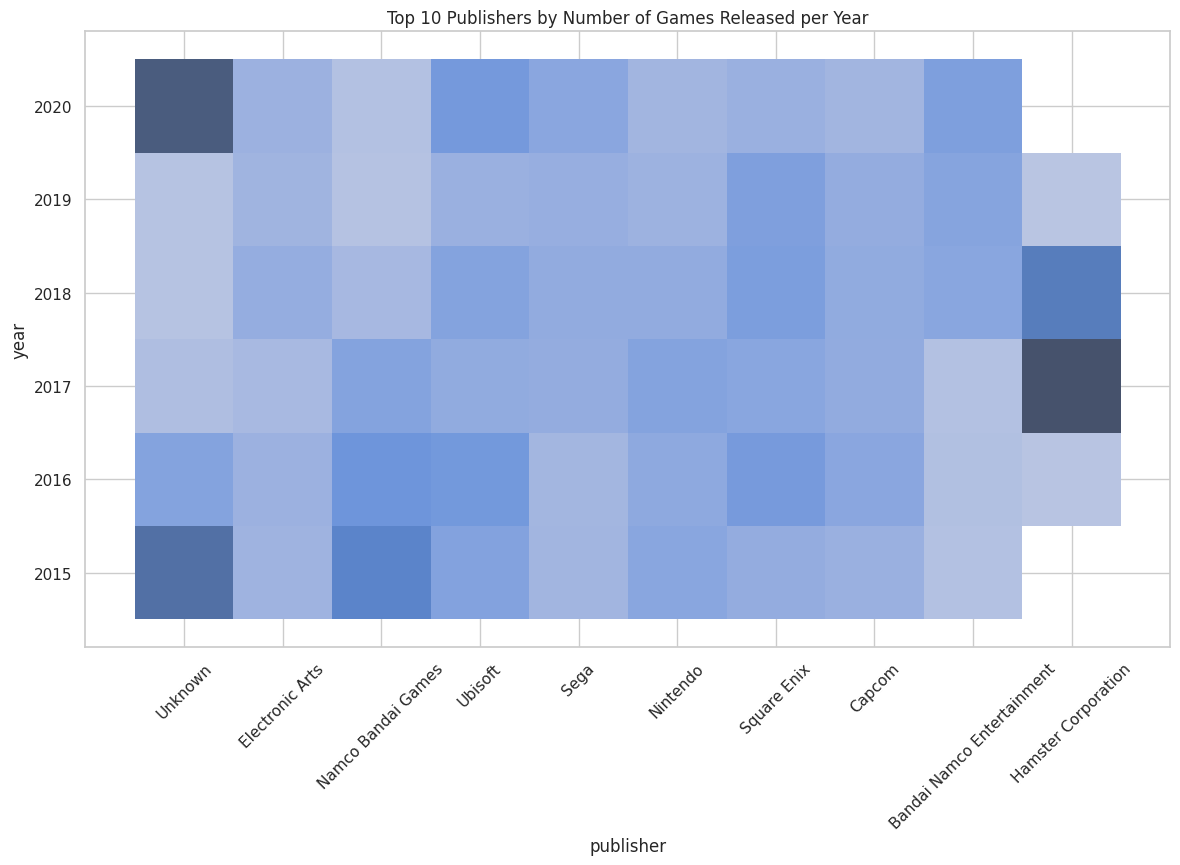

DataFrame[publisher: string, year: int, released_title_count: bigint]

In [13]:
# кол-во выпущенных игр на каждый год для топ n издателей
publisher.count_of_games_by_year_from_publisher(df, 2015, 2020)

+--------------------+--------+
|               title|na_sales|
+--------------------+--------+
|  Grand Theft Auto V|   26.19|
|Call of Duty: Bla...|   17.65|
|Call of Duty: Mod...|   15.57|
|Call of Duty: Ghosts|   15.06|
|Call of Duty: Bla...|   14.12|
|Call of Duty: Mod...|   13.54|
|Call of Duty: Bla...|   12.82|
| Grand Theft Auto IV|    11.6|
|Guitar Hero III: ...|   11.14|
|Call of Duty: Adv...|   10.66|
|Call of Duty 4: M...|   10.06|
|The Elder Scrolls...|    9.52|
|Call of Duty: Wor...|    9.38|
|           Minecraft|    9.07|
|Red Dead Redempti...|    9.02|
|LEGO Star Wars: T...|    8.95|
|  Call of Duty: WWII|    8.49|
|Grand Theft Auto:...|    8.41|
|       Battlefield 3|    8.22|
|       Madden NFL 06|    7.68|
|LEGO Batman: The ...|    7.67|
|Call of Duty: Bla...|    7.37|
|       Madden NFL 08|    7.13|
|         Halo: Reach|    7.08|
|Grand Theft Auto III|    6.99|
|     Madden NFL 2005|    6.85|
|LEGO Indiana Jone...|    6.77|
|              Halo 4|    6.72|
|       

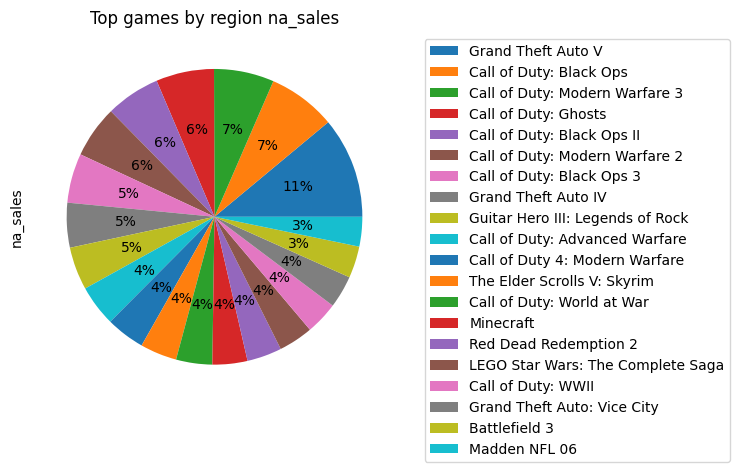

DataFrame[title: string, na_sales: double]

In [3]:
# диаграмма популярных игр (определяется по продажам) в определенном регионе
games.get_popular_games_by_region(df, "na_sales")

+----------------+---------+
|genre           |pal_sales|
+----------------+---------+
|Action          |342.52   |
|Sports          |341.92   |
|Shooter         |324.74   |
|Racing          |179.14   |
|Misc            |146.71   |
|Platform        |99.39    |
|Adventure       |91.52    |
|Role-Playing    |91.02    |
|Simulation      |86.86    |
|Fighting        |79.84    |
|Action-Adventure|59.52    |
|Strategy        |27.05    |
|Puzzle          |25.78    |
|Music           |15.02    |
|MMO             |2.94     |
|Party           |1.81     |
|Sandbox         |0.56     |
|Board Game      |0.22     |
|Education       |0.2      |
|Visual Novel    |0.07     |
+----------------+---------+



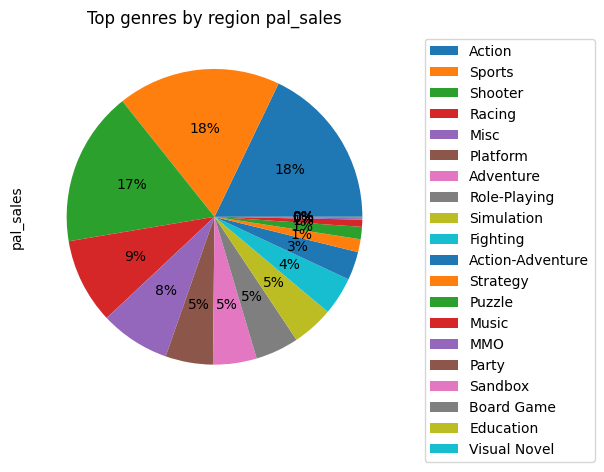

DataFrame[genre: string, pal_sales: double]

In [4]:
# диаграмма популярных жанров в определенном регионе
genres.get_popular_genres_by_region(df, "pal_sales")

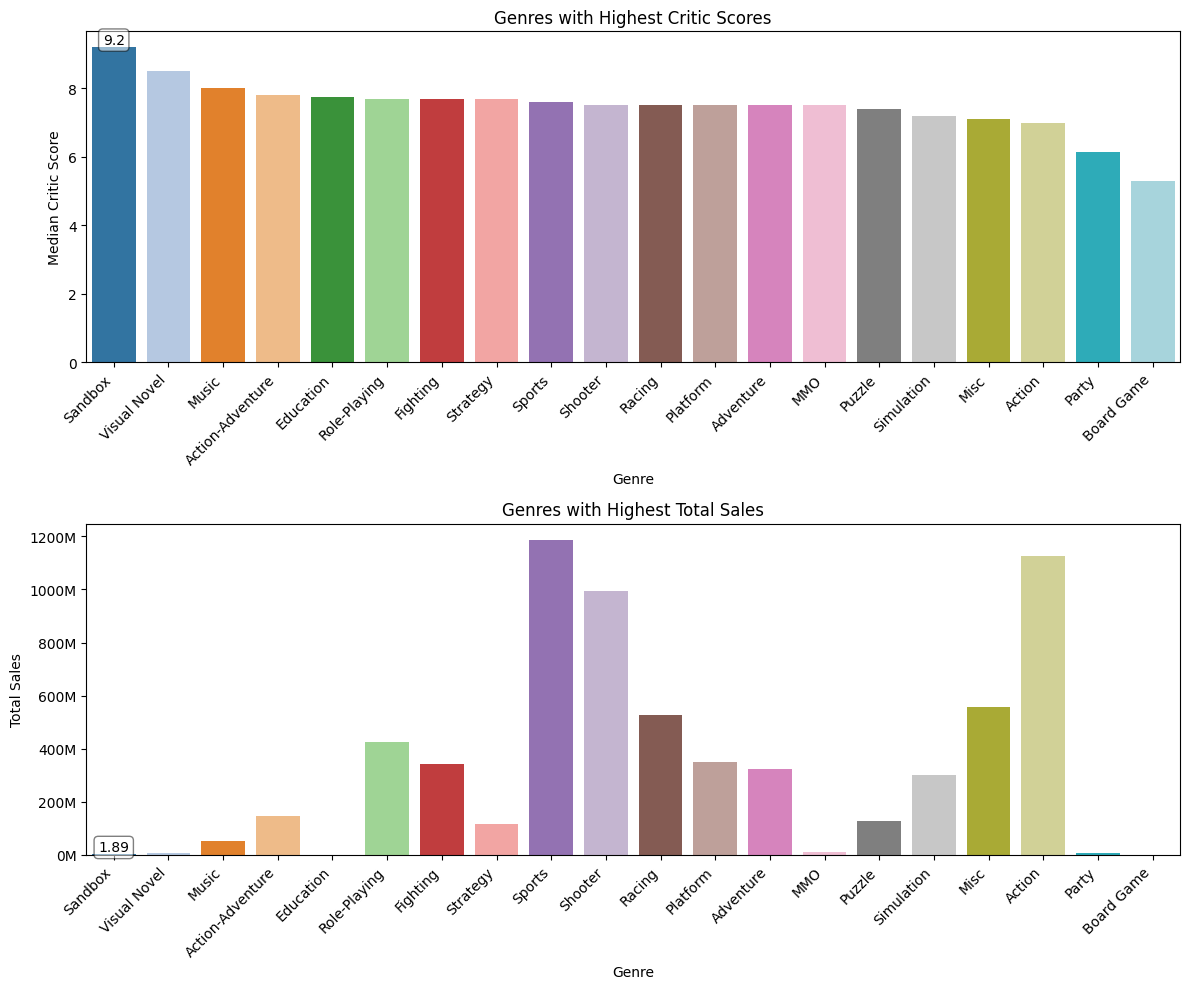

In [5]:
# Топ жанров по оценкам критиков и продажам
genres.get_top_genres_by_critic_score_and_sales(df)

Correlation between critic_score and na_sales: 0.3603082987235861
Correlation between critic_score and jp_sales: 0.14743267236534344
Correlation between critic_score and pal_sales: 0.3152068070313734
Correlation between critic_score and other_sales: 0.3206361999344065
Correlation between critic_score and total_sales: 0.3696868028666367


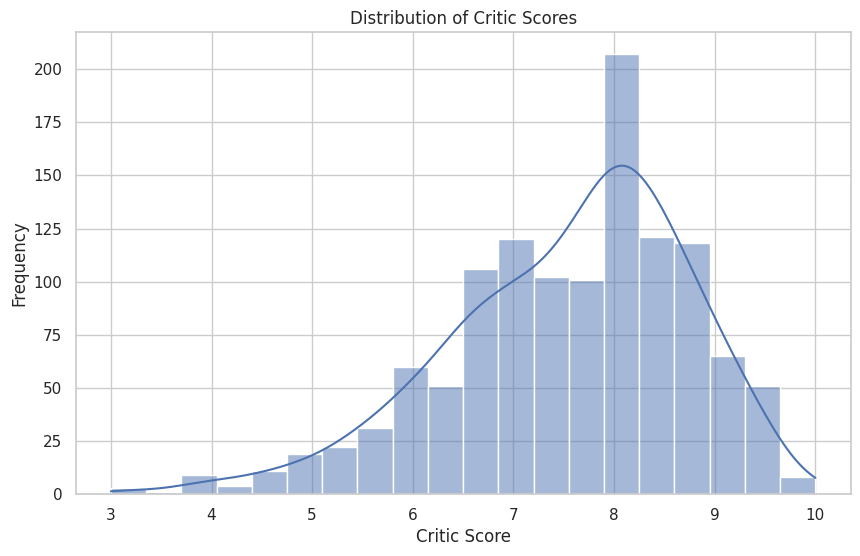

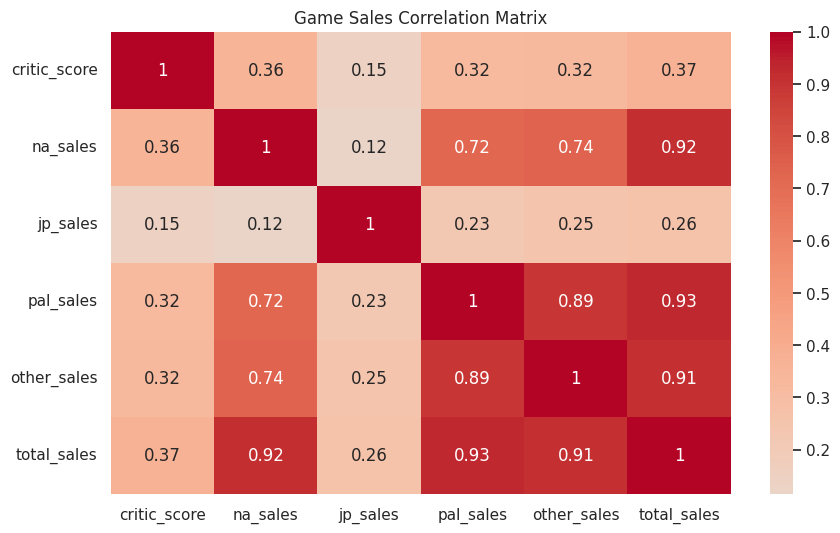

In [6]:
# распределение продаж игр по оценкам критиков и тепловая карта корреляции между продажами
# игр в различных регионах и оценками критиков
games.game_sale_estimates(df)

+-------+--------+
|console|jp_sales|
+-------+--------+
|PS4    |27.04   |
|3DS    |20.43   |
|PSV    |15.71   |
|PS3    |6.65    |
|NS     |4.23    |
|WiiU   |1.67    |
|PSP    |1.17    |
|GBA    |0.64    |
|PSN    |0.23    |
|XOne   |0.22    |
|SAT    |0.15    |
|PS2    |0.14    |
|X360   |0.02    |
|DS     |0.02    |
|PC     |NULL    |
|Amig   |NULL    |
|Arc    |NULL    |
|OR     |NULL    |
|iOS    |NULL    |
|OSX    |NULL    |
|WinP   |NULL    |
|SNES   |NULL    |
|Linux  |NULL    |
|GB     |NULL    |
|WW     |NULL    |
|All    |NULL    |
|Series |NULL    |
|2600   |NULL    |
|XS     |NULL    |
|Wii    |NULL    |
|PS5    |NULL    |
|And    |NULL    |
|NES    |NULL    |
|PS     |NULL    |
|DC     |NULL    |
|GEN    |NULL    |
|XBL    |NULL    |
|PCFX   |NULL    |
|DSiW   |NULL    |
|SCD    |NULL    |
|BRW    |NULL    |
|VC     |NULL    |
|Ouya   |NULL    |
|Lynx   |NULL    |
+-------+--------+



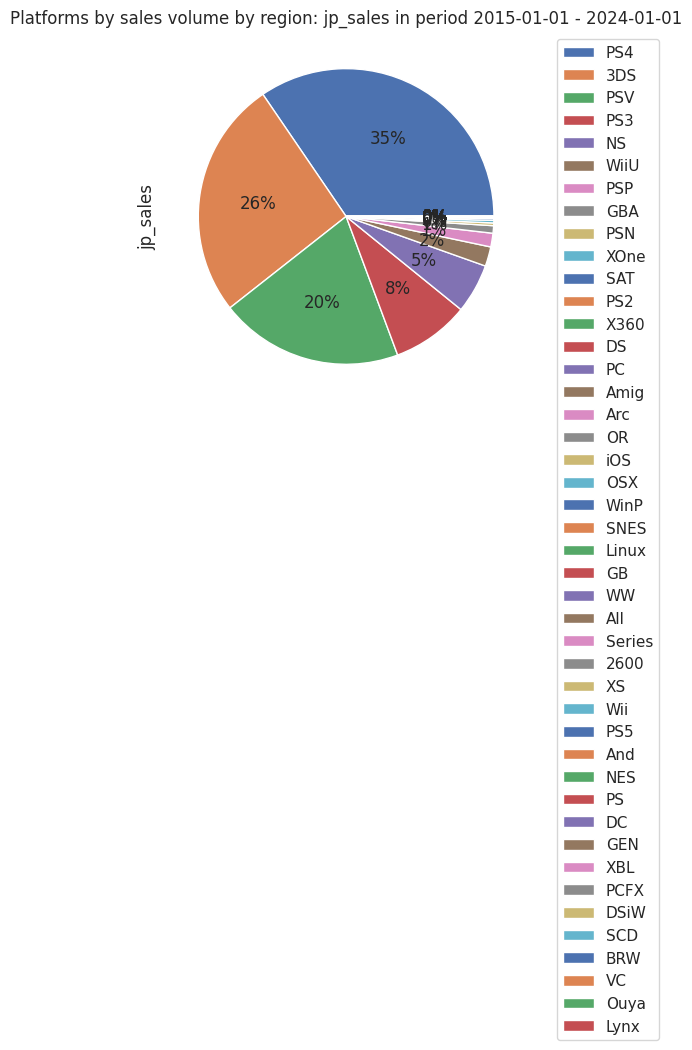

DataFrame[console: string, jp_sales: double]

In [7]:
# диаграмма популярных игровых платформ в определенном регионе и промежутке времени
platforms.get_popular_platforms_by_region(df, "jp_sales", date(2015, 1, 1), date(2024, 1, 1))

+--------------------------------------------+------------------+-------------------+------------------+-------------------+
|title                                       |na_sales          |jp_sales           |pal_sales         |other_sales        |
+--------------------------------------------+------------------+-------------------+------------------+-------------------+
|Grand Theft Auto: Vice City                 |8.40999984741211  |0.4699999988079071 |5.489999771118164 |1.7799999713897705 |
|Grand Theft Auto                            |0.7900000214576721|0.03999999910593033|1.350000023841858 |0.14000000059604645|
|Grand Theft Auto V                          |26.19000005722046 |1.6600000318139791 |28.140000343322754|8.319999814033508  |
|Grand Theft Auto: Liberty City Stories      |4.460000038146973 |0.3099999949336052 |4.229999899864197 |2.240000009536743  |
|Grand Theft Auto: Vice City Stories         |2.4800000190734863|0.18999999575316906|2.0599999707192183|1.3200000524520874 |


24/06/21 20:13:18 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


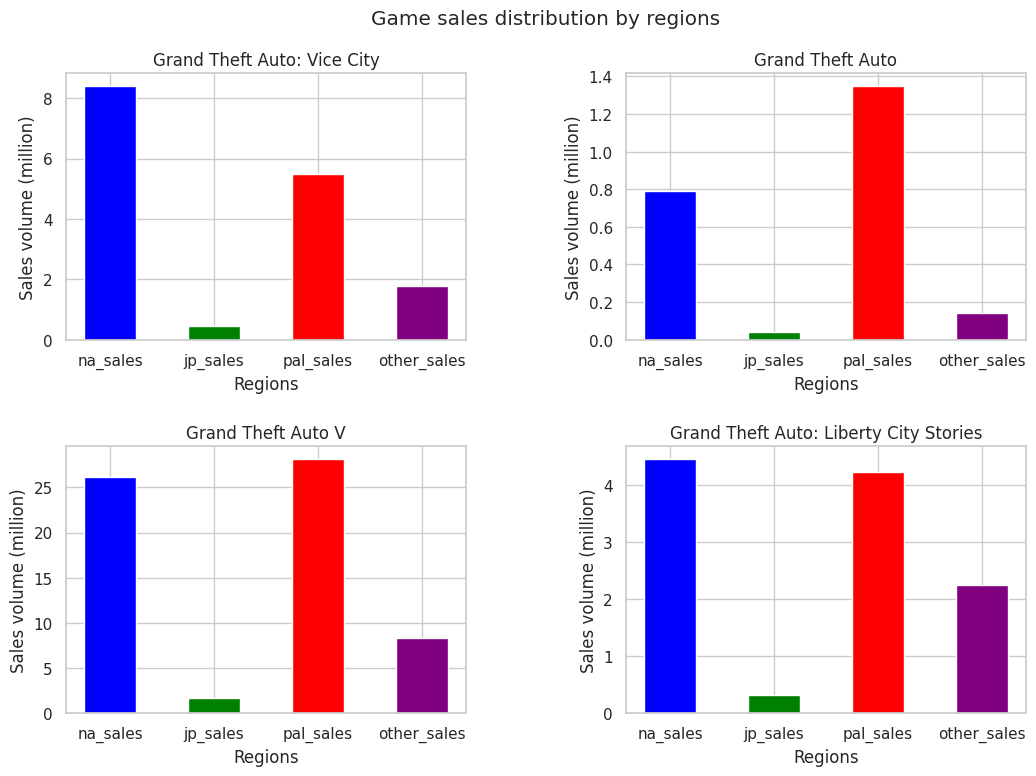

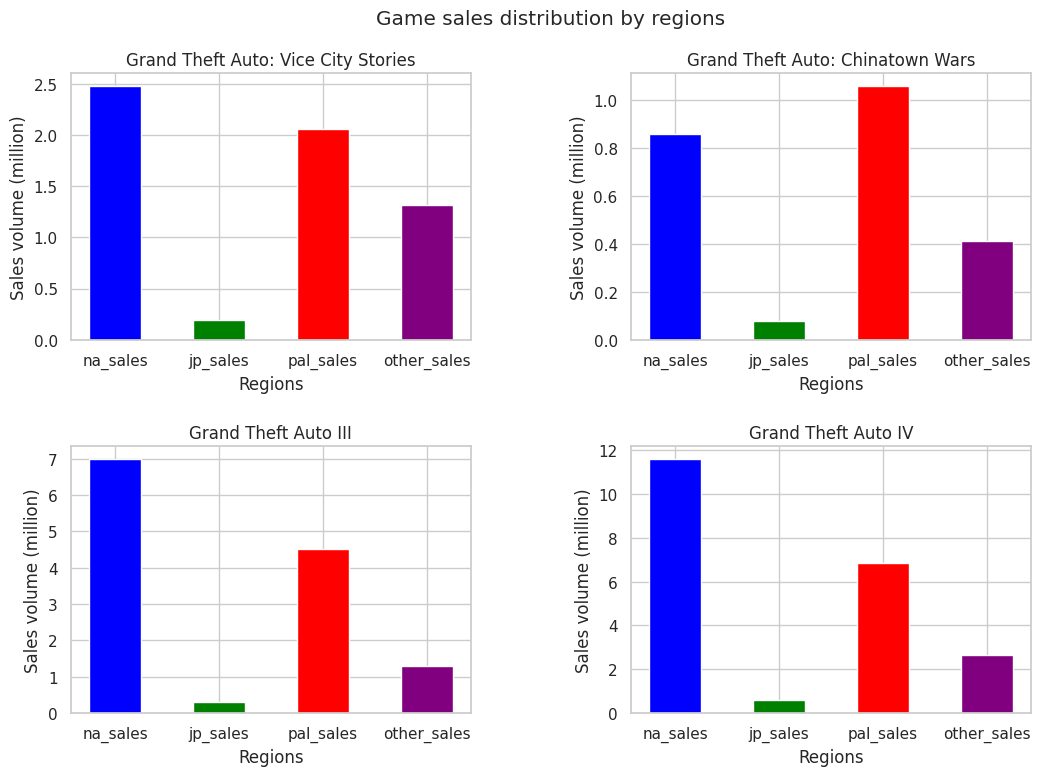

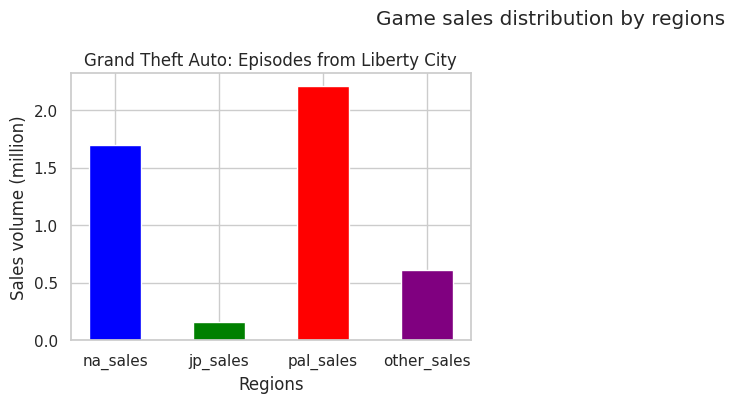

DataFrame[title: string, na_sales: double, jp_sales: double, pal_sales: double, other_sales: double]

In [8]:
games.get_game_sales_by_region(df, "grand theft auto")

In [9]:
predictions.predict_next_game_performance(spark_session, df, "Battlefield", "PS4")

+-------------+-------+-------+---------------+---------+------------+-----------+--------+--------+---------+-----------+------------+--------------------+
|title        |console|genre  |publisher      |developer|critic_score|total_sales|na_sales|jp_sales|pal_sales|other_sales|release_date|release_date_numeric|
+-------------+-------+-------+---------------+---------+------------+-----------+--------+--------+---------+-----------+------------+--------------------+
|Battlefield 4|PS4    |Shooter|Electronic Arts|EA DICE  |8.3         |3.94       |1.4     |0.19    |1.74     |0.62       |2013-11-15  |1384459200          |
|Battlefield 1|PS4    |Shooter|Electronic Arts|EA DICE  |9.1         |7.26       |2.2     |0.29    |3.65     |1.12       |2016-10-21  |1476997200          |
+-------------+-------+-------+---------------+---------+------------+-----------+--------+--------+---------+-----------+------------+--------------------+



24/06/21 20:13:20 WARN Instrumentation: [e06cdf51] regParam is zero, which might cause numerical instability and overfitting.
24/06/21 20:13:21 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/06/21 20:13:21 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS
24/06/21 20:13:21 WARN Instrumentation: [e06cdf51] The standard deviation of the label is zero, so the coefficients will be zeros and the intercept will be the mean of the label; as a result, training is not needed.


Root Mean Squared Error (RMSE) on test data for critic_score: 0.8000001907348633


24/06/21 20:13:23 WARN Instrumentation: [ab8e4cb2] regParam is zero, which might cause numerical instability and overfitting.
24/06/21 20:13:23 WARN Instrumentation: [ab8e4cb2] The standard deviation of the label is zero, so the coefficients will be zeros and the intercept will be the mean of the label; as a result, training is not needed.


Root Mean Squared Error (RMSE) on test data for total_sales: 3.320000171661377


24/06/21 20:13:25 WARN Instrumentation: [c480765a] regParam is zero, which might cause numerical instability and overfitting.
24/06/21 20:13:25 WARN Instrumentation: [c480765a] The standard deviation of the label is zero, so the coefficients will be zeros and the intercept will be the mean of the label; as a result, training is not needed.


Root Mean Squared Error (RMSE) on test data for na_sales: 0.8000000715255737


24/06/21 20:13:27 WARN Instrumentation: [7d497c14] regParam is zero, which might cause numerical instability and overfitting.
24/06/21 20:13:27 WARN Instrumentation: [7d497c14] The standard deviation of the label is zero, so the coefficients will be zeros and the intercept will be the mean of the label; as a result, training is not needed.


Root Mean Squared Error (RMSE) on test data for jp_sales: 0.09999999403953552
Predicted Critic Score: 8.300000190734863
Predicted Total Sales: 3.940000057220459
Predicted NA Sales: 1.399999976158142
Predicted JP Sales: 0.1899999976158142


In [10]:
predictions.predict_next_game_performance_random_tree(spark_session, df, "Call of Duty")

+---------------------------------------+-------+-------+----------+------------------+------------+-----------+--------+--------+---------+-----------+------------+-----------+
|title                                  |console|genre  |publisher |developer         |critic_score|total_sales|na_sales|jp_sales|pal_sales|other_sales|release_date|last_update|
+---------------------------------------+-------+-------+----------+------------------+------------+-----------+--------+--------+---------+-----------+------------+-----------+
|Call of Duty: Black Ops 3              |PS4    |Shooter|Activision|Treyarch          |8.1         |15.09      |6.18    |0.41    |6.05     |2.44       |2015-11-06  |2018-01-14 |
|Call of Duty: Black Ops II             |X360   |Shooter|Activision|Treyarch          |8.4         |13.86      |8.27    |0.07    |4.32     |1.2        |2012-11-13  |2018-04-07 |
|Call of Duty: Black Ops II             |PS3    |Shooter|Activision|Treyarch          |8.0         |13.8      

24/06/21 20:13:29 WARN DecisionTreeMetadata: DecisionTree reducing maxBins from 32 to 11 (= number of training instances)


R^2 for critic_score: -1.7918788494980262
Training model for total_sales...


24/06/21 20:13:31 WARN DecisionTreeMetadata: DecisionTree reducing maxBins from 32 to 11 (= number of training instances)


R^2 for total_sales: 0.8802943745812624
Training model for na_sales...


24/06/21 20:13:33 WARN DecisionTreeMetadata: DecisionTree reducing maxBins from 32 to 11 (= number of training instances)


R^2 for na_sales: 0.6874814826674257
Training model for jp_sales...


24/06/21 20:13:34 WARN DecisionTreeMetadata: DecisionTree reducing maxBins from 32 to 11 (= number of training instances)


R^2 for jp_sales: 0.5067379083207959
Predicted values for the next game in the series:
critic_score: 6.945000123977661
total_sales: 2.313699997365475
na_sales: 1.121116670916478
jp_sales: 0.04575000016950071


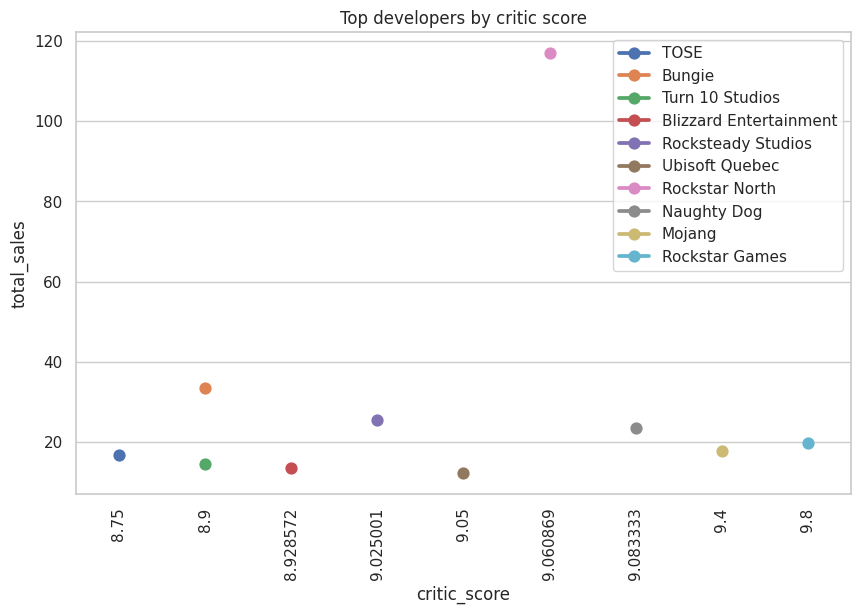

In [11]:
developers.get_top_developers_by_critic_score(df)

+--------------------+------------------+-----+
|           publisher|       total_sales|title|
+--------------------+------------------+-----+
|          Activision| 722.7699973676354| 1582|
|     Electronic Arts| 644.1299985796213| 1619|
|           EA Sports|485.66000073589385|  804|
|             Ubisoft| 462.5699989236891| 1663|
|                 THQ| 320.8899994492531| 1111|
|Sony Computer Ent...| 311.0799998641014| 1372|
|      Rockstar Games| 239.6699985936284|  180|
|              Konami|210.69999990984797| 1544|
|                Sega|206.37999951839447| 2207|
|            Nintendo|140.79999986290932| 1476|
|              Capcom|131.23999955877662| 1092|
|           LucasArts|   118.47999939695|  254|
|  Bethesda Softworks|111.07999936491251|  257|
|Warner Bros. Inte...|103.50999956764281|  280|
|Disney Interactiv...|103.30000004172325|  304|
|               Atari|101.63000000454485|  839|
|           2K Sports|101.04000025428832|  250|
|         Square Enix| 95.74000011011958

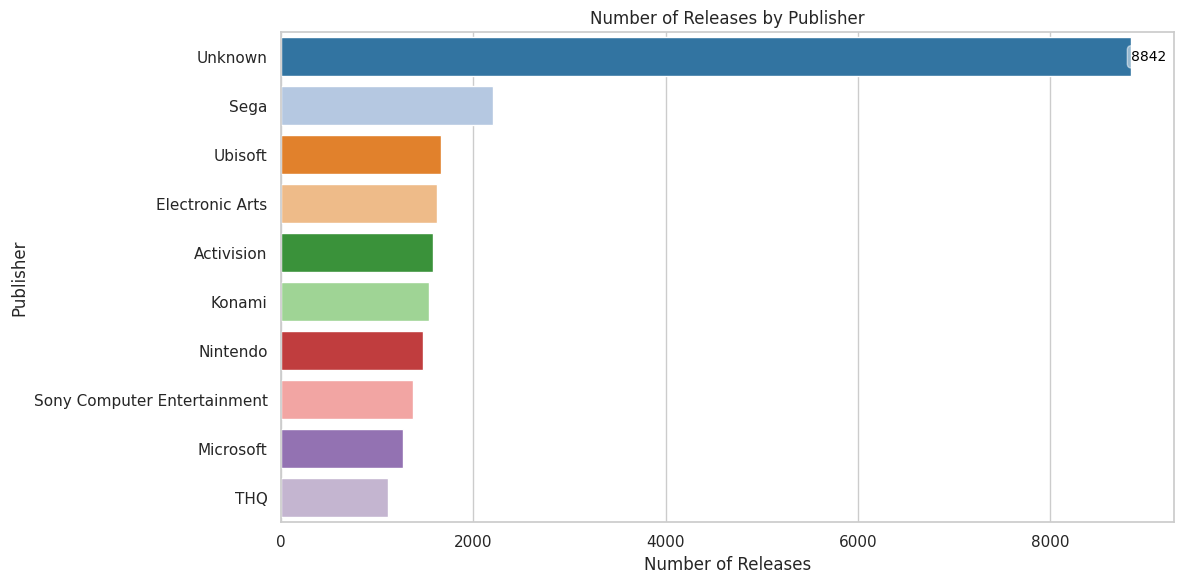

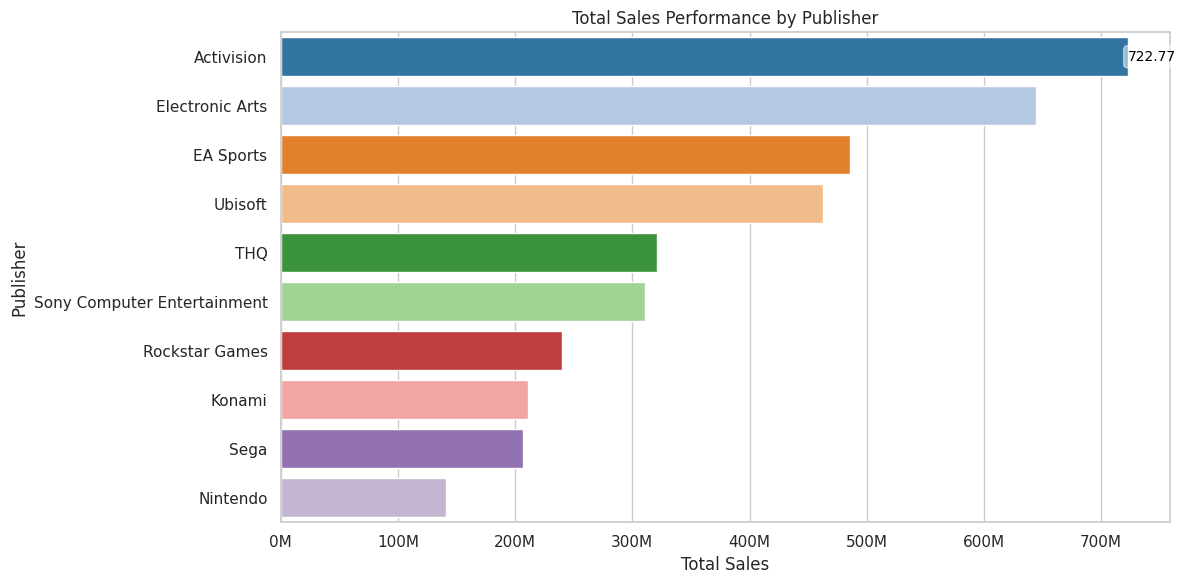

DataFrame[publisher: string, total_sales: double, title: bigint]

In [12]:
publisher.get_top_sales_performance_by_publisher(df)